# Sprint　機械学習スクラッチ　線形回帰

## 1.このSprintについて

### Sprintの目的
- スクラッチを通して線形回帰を理解する
- オブジェクト指向を意識した実装に慣れる
- 数式をコードに落とし込めるようにする

### どのように学ぶか
#### **スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。**

### 線形回帰スクラッチ

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

**雛形**

In [170]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [171]:
class ScratchLinearRegression():
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X):
        x1 = X
        
        # x0（バイアス項）の作成
        if self.no_bias == True:
            x0 = np.zeros(x1.shape[0])
        else:
            x0 = np.ones(x1.shape[0])
   #バイアス項を、 Xの前に加える　バイアス項＝切片,interceptとか 
        return np.concatenate([x0.reshape(-1,1),x1],axis=1)
    
    def fit(self, X, y, X_val=False, y_val=False):
        x1 = self._linear_hypothesis(X)
        
        # パラメータθの初期値を乱数で与える
        self.theta = np.random.random(x1.shape[1])
        
        for i in range(self.iter):
            
            # 仮定関数で予測値を計算
            y1 = np.dot(x1,self.theta)
            
            # 真の値と予測値の誤差を計算
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2
            
            # X_validを入力した場合は、x2として読み込む
            if (type(X_val) != bool):
                x2 = self._linear_hypothesis(X_val)
                y2 = np.dot(x2,self.theta)
                
                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2 
            
            # パラメータθを最急降下法で、最適化
            self._gradient_descent(x1, error)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
                
    def _gradient_descent(self, X, error):
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)
        
                
    def predict(self, X):
         return np.dot(self._linear_hypothesis(X),self.theta)

In [131]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        
        # x0（バイアス項）の作成
        if self.no_bias == True:
            x0 = np.zeros(x1.shape[0])
        else:
            x0 = np.ones(x1.shape[0])
    
        return np.concatenate([x0.reshape(-1,1),x1],axis=1)
    
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        self.theta = self.theta - self.lr*np.dot(error, X)/len(X)
        
        
    def fit(self, X, y, X_val=False, y_val=False):
        """
        線形回帰を学習する。
        検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        x1 = self._linear_hypothesis(X)
        
        # パラメータθの初期値を乱数で与える(初期値は適当でいい)
        self.theta = np.random.random(x1.shape[1])
        
        for i in range(self.iter):
            
            # 仮定関数で予測値を計算
            y1 = np.dot(x1,self.theta)
            
            # 真の値と予測値の誤差を計算
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2
            
            # X_validを入力した場合は、x2として読み込む
            if (type(X_val) != bool):
                x2 = self._linear_hypothesis(X_val)
                y2 = np.dot(x2,self.theta)
                
                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2 
            
            # パラメータθを最急降下法で、最適化
            self._gradient_descent(x1, error)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
                
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        return np.dot(self._linear_hypothesis(X),self.theta)

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
h_θ(x)=θ_0x_0+θ_1x_1+...+θ_jx_j+...+θ_nx_n.(x_0=1)
$$

$$
x: 特徴量ベクトル
$$

$$
θ: パラメータベクトル
$$

$$
n: 特徴量の数
$$

$$
x_j: j番目の特徴量
$$

$$
θ_j: j番目のパラメータ（重み）
$$


特徴量の数nは任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。

$$
h_θ(x)=θ^T⋅x.
$$


**雛形**

クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

In [172]:
# 関数外でテスト
x1 = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
x0 = np.ones([x1.shape[0]])
print(x1), print(x1.shape)
print(x0), print(x0.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(10,)


(None, None)

In [173]:
#reshape(-1,1)の-1はデータ数を行数に変える、１は列数を１にするという意味
#https://qiita.com/yosshi4486/items/deb49d5a433a2c8a8ed4
X = np.concatenate([x0.reshape(-1,1),x1],axis=1)
print(X), print(X.shape)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
(10, 2)


(None, None)

In [174]:
#random.randomは0.0以上1.0未満の乱数を返す()内の引数で返す数を変える
theta = np.random.random(X.shape[1])
print(theta)

[0.15015627 0.23344495]


In [175]:
np.dot(X, theta), np.dot(X, theta).shape

(array([0.15015627, 0.38360122, 0.61704617, 0.85049111, 1.08393606,
        1.317381  , 1.55082595, 1.78427089, 2.01771584, 2.25116079]),
 (10,))

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。

$$
θ_j:=θ_j−α\frac{1}{m}\sum_{i=1}^{m}[(h_θ(x^i)−y^i)x^i_j]
$$

α : 学習率


i : サンプルのインデックス


j : 特徴量のインデックス


**雛形**


ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。



In [176]:
# 関数外で一回だけ計算
x1 = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8]]) #学習用データ
y = np.array([2,4,2,1,6,7,8,5,2]) #実測値

print(x1), print(x1.shape)
print(y), print(y.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
(9, 1)
[2 4 2 1 6 7 8 5 2]
(9,)


(None, None)

In [177]:
x0 = np.ones(x1.shape[0]) 
X = np.concatenate([x0.reshape(-1,1),x1],axis=1)
theta = np.random.random(X.shape[1])
print(x0)
print(x0.shape)
print(X)
print(X.shape)
print(theta)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
(9,)
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]]
(9, 2)
[0.04902006 0.67032319]


In [178]:
y1 = np.dot(X,theta) #y1は予測値(変数にパラメータを掛けたもの→y_hat=ax)
print(y1)
print(type(y1))

[0.04902006 0.71934325 1.38966644 2.05998963 2.73031282 3.40063601
 4.0709592  4.74128239 5.41160558]
<class 'numpy.ndarray'>


In [179]:
error = (y1 - y)
print(error)
print(error.shape)

[-1.95097994 -3.28065675 -0.61033356  1.05998963 -3.26968718 -3.59936399
 -3.9290408  -0.25871761  3.41160558]
(9,)


In [180]:
alpha = 0.01
#1/mがサンプルサイズ(shape[0])で割るから、Σの計算で最終的に平均
theta[0] = theta[0] - alpha*np.mean(error*x0)
theta[1] = theta[1] - alpha*np.mean(error*x1)
print(theta[0])
print(theta[1])
print(np.mean(error*x0))
print(np.mean(error*x1))

0.06282804521861217
0.7255551216448278
-1.3807982883291419
-5.523193153316567


In [181]:
# thetaの計算を一行で行ってみる
np.dot(error, X)

array([-12.42718459, -30.48934697])

In [182]:
# θの更新を一回してみる
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta = np.random.random(2)
y1 = np.dot(X,theta)

alpha = 0.01

error = (y1 - y)
print('更新前:', theta)
theta = theta - alpha*np.dot(error,X)/len(X)
print('更新後:', theta)

更新前: [0.98920207 0.20962063]
更新後: [1.01203633 0.31031632]


雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

In [183]:
#randnは標準正規分布（ガウス分布）でランダムな数値を出力する。標準正規分布（ガウス分布）は、平均0, 標準偏差1の正規分布である。
#つまり、平均が0になる範囲のランダムな数値を出力する。0に近い数値が出力されやすく、値が-1~+1の間に偏っている。

X = np.random.randn(30,1)
y = np.random.randn(30,)
X_test = np.random.randn(5,1)

print(X)
print(y)
print(X_test)

[[-0.32539299]
 [ 0.90864795]
 [-0.88332634]
 [-1.23065854]
 [ 1.43575576]
 [ 0.32420509]
 [-0.37466466]
 [ 0.63884954]
 [ 0.45186363]
 [ 0.23646718]
 [ 0.78149791]
 [-0.08513149]
 [-0.2815423 ]
 [-0.72639539]
 [ 0.97395352]
 [ 1.397622  ]
 [ 1.36326987]
 [-0.79310701]
 [ 0.89049119]
 [-1.02607201]
 [ 0.20285081]
 [ 1.1348008 ]
 [ 1.03623117]
 [-1.40541253]
 [-1.23195366]
 [-0.90672682]
 [-1.98961527]
 [-1.04653972]
 [ 0.4792484 ]
 [ 1.30689237]]
[-1.14529297 -1.37052867  1.26629797 -1.39982127  0.07261548  0.01039185
  1.66819418 -0.26420684  1.80575136 -1.4752287  -1.85934145 -1.2983201
  1.48770467 -1.65965987 -0.61548187  1.65788552  1.19567929  0.64663275
  0.66614984  0.739525   -0.67244023  1.4266598  -0.50291626 -2.511942
 -1.61639919 -1.00001317  0.10372438  0.60220249 -0.23036668 -0.45318699]
[[-1.74530784]
 [ 0.36053324]
 [ 1.60408046]
 [-1.89974036]
 [-0.91243911]]


In [184]:
print('X.shape',X.shape)
print('y.shape',y.shape)

X.shape (30, 1)
y.shape (30,)


In [185]:
reg = ScratchLinearRegression(num_iter=10000, lr=0.0001, verbose=False)

reg.fit(X,y)
y_pred = reg.predict(X_test)

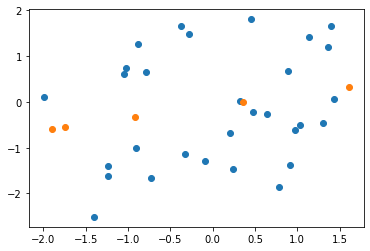

In [186]:
plt.scatter(X,y)
plt.scatter(X_test,y_pred)
plt.plot();

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

In [187]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.mean((y-y_pred)**2)
#    mse = np.dot((y-y_pred).T, (y-y_pred))/len(y) 上記と同じ結果になる
    
    return mse

In [188]:
y_test = np.array([2,4,2,1,6])
y_pred = np.array([2,4,2,4,1])


mse = MSE(y_pred, y_test)
mse

6.8

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） J(θ) は次の式です。
$$
J(θ)=\frac{1}{2m}\sum_{i=1}^{m}(h_θ(x^i)−y^i)^2. \quad
$$

$$
m : 入力されるデータの数
$$
$$
h_θ() : 仮定関数
$$
$$
x^i : i番目のサンプルの特徴量ベクトル
$$
$$
y^i : i番目のサンプルの正解値
$$


In [189]:
print(reg.loss.shape)
reg.loss.reshape(-1,1)

(10000,)


array([[0.71623501],
       [0.71623044],
       [0.71622588],
       ...,
       [0.69641644],
       [0.69641582],
       [0.69641519]])

In [190]:
print(reg.val_loss.shape)
reg.val_loss.reshape(-1,1)

(10000,)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [339]:
# House Pricesのtrainデータを読み込む
train = pd.read_csv('train.csv')
print('shape:',train.shape)
train.head()

shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [343]:
X = train[['YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X.shape: (1460, 1)
y.shape: (1460,)


In [344]:
# 訓練データ、検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (1168, 1)
y_train.shape: (1168,)
X_valid.shape: (292, 1)
y_valid.shape: (292,)


In [345]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [346]:
reg1 = ScratchLinearRegression()

reg1.fit(X_train_std,y_train, X_valid_std, y_valid)
y_pred1 = reg1.predict(X_valid_std)

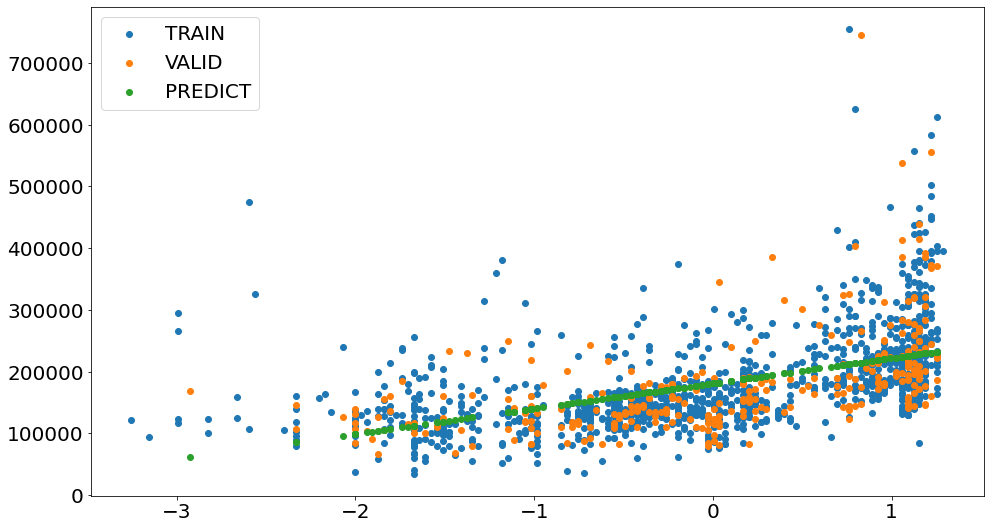

In [347]:
# 訓練データ、検証データ、予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred1,label="PREDICT")
plt.legend()
plt.plot();

In [348]:
# 平均二乗誤差
mse = MSE(y_pred1, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4980054387.6
RMSE70569.5


In [349]:
#sklearnによる実装を行い比較する
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()

reg2.fit(X_train_std,y_train)
y_pred_sklearn = reg2.predict(X_valid_std)

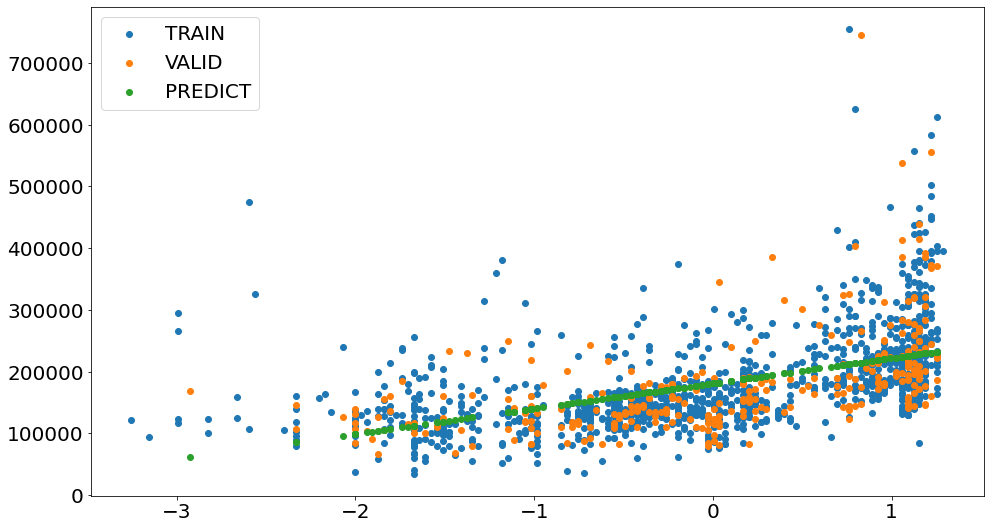

In [350]:
# sklearnによる予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred_sklearn,label="PREDICT")
plt.legend()
plt.plot();

In [351]:
# 平均二乗誤差
mse = MSE(y_pred_sklearn, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4980069536.6
RMSE70569.6


## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

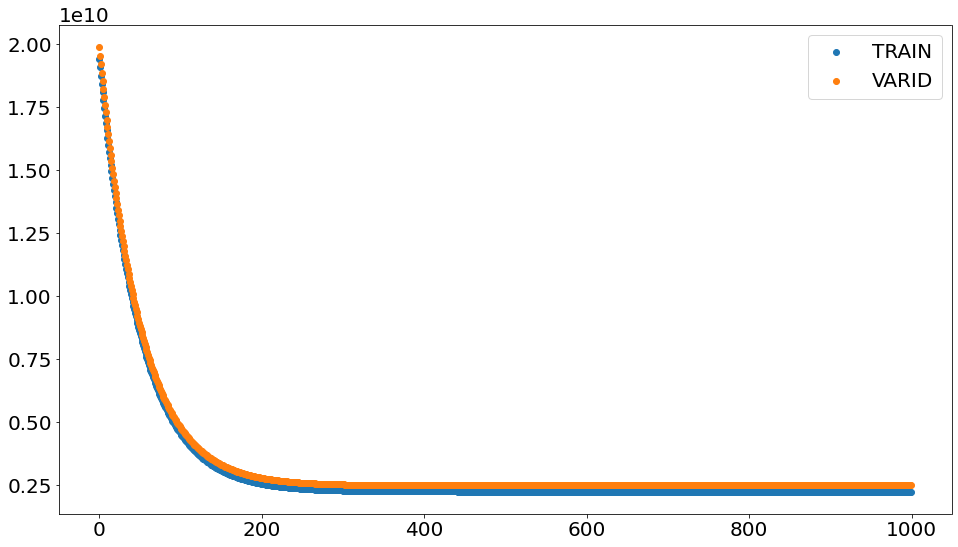

In [352]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg1.loss)),reg1.loss,label='TRAIN')
plt.scatter(range(len(reg1.val_loss)),reg1.val_loss,label='VARID')
plt.legend()
plt.plot();

In [353]:
#パラメータを変えて行う
reg3 = ScratchLinearRegression(num_iter=5000, lr=0.001)

reg3.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred3 = reg3.predict(X_valid_std)

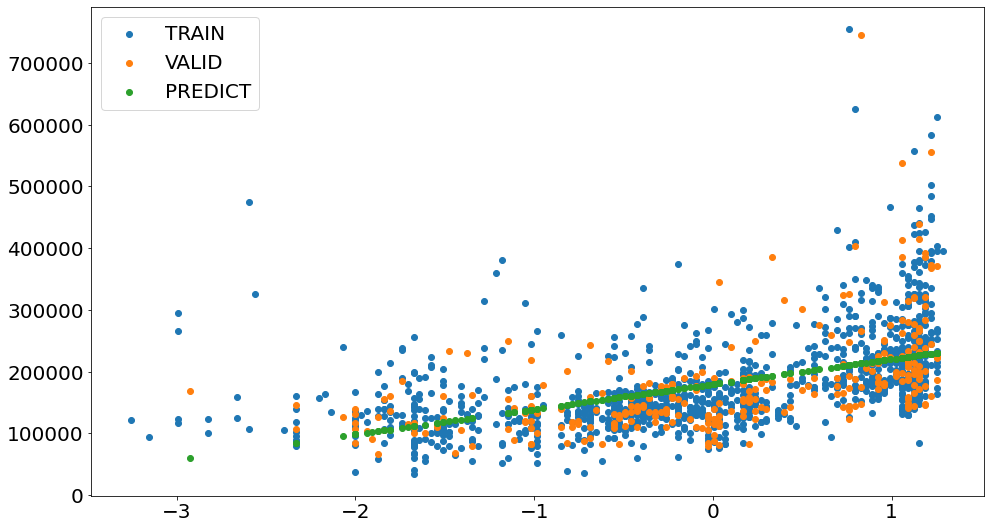

In [354]:
# 訓練データ、検証データ、予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred3,label="PREDICT")
plt.legend()
plt.plot();

In [355]:
# 平均二乗誤差
mse = MSE(y_pred3, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4979289723.2
RMSE70564.1


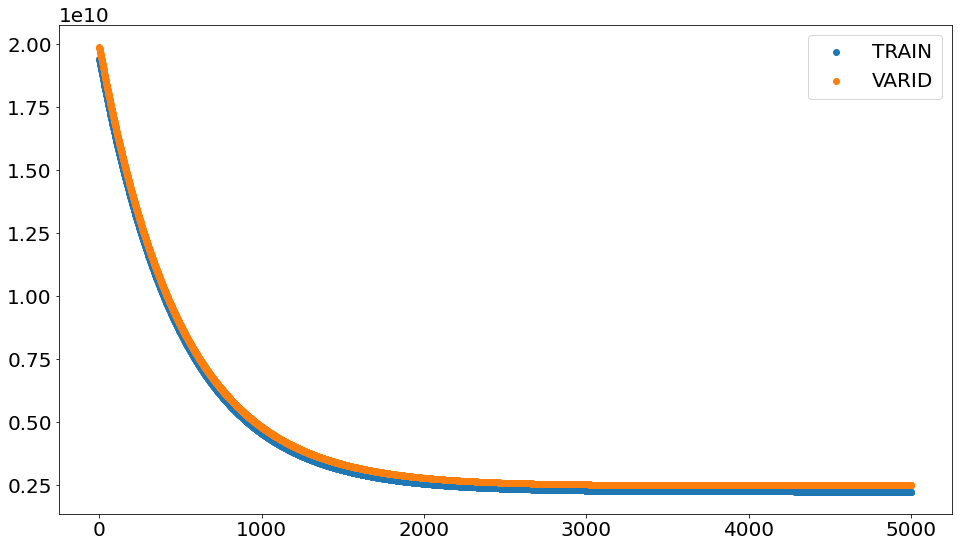

In [356]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg3.loss)),reg3.loss,label='TRAIN')
plt.scatter(range(len(reg3.val_loss)),reg3.val_loss,label='VARID')
plt.legend()
plt.plot();

## 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 
θ
0
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。



In [227]:
#　バイアス項を除去した結果を確認
reg4 = ScratchLinearRegression(num_iter=10000, lr=0.001, no_bias=True)

reg4.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred4 = reg4.predict(X_valid_std)

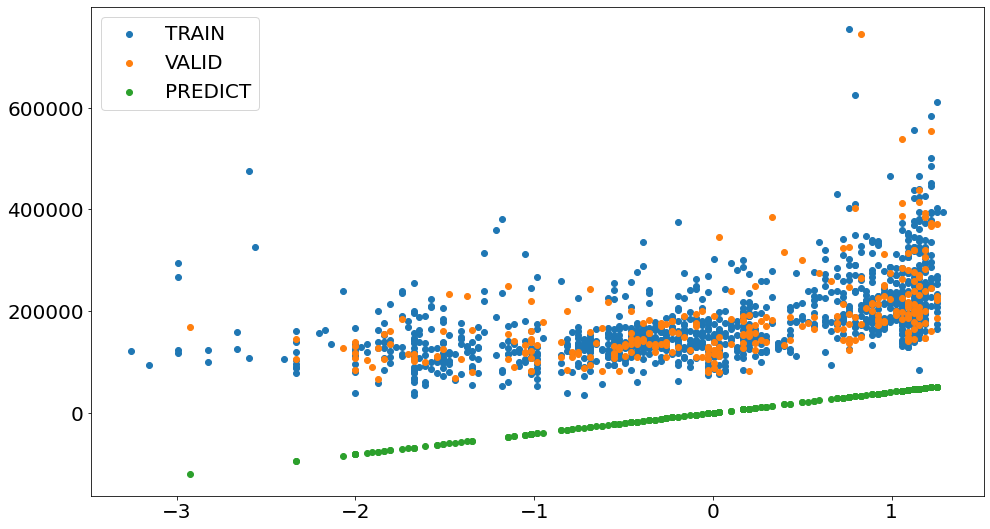

In [228]:
# 訓練データ、検証データ、予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred4,label="PREDICT")
plt.legend()
plt.plot();

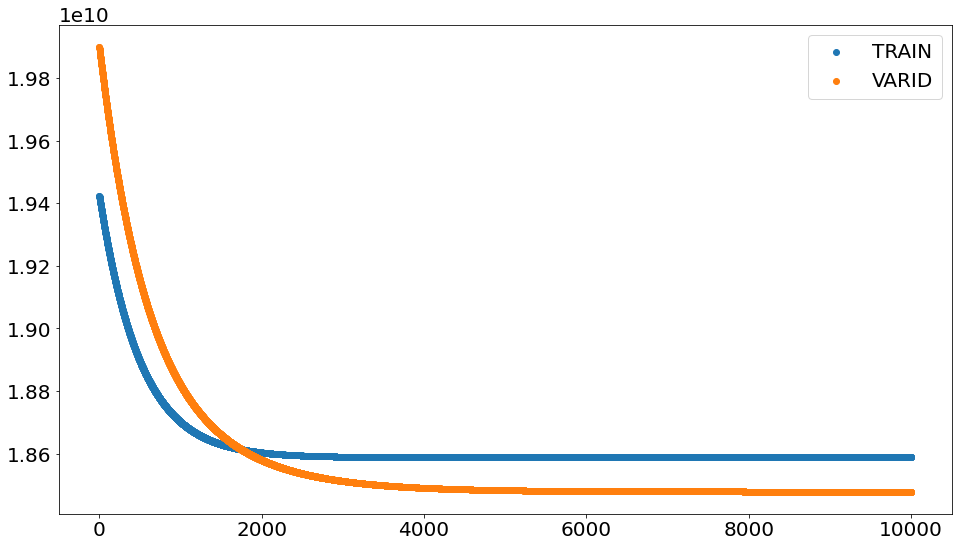

In [229]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg4.loss)),reg4.loss,label='TRAIN')
plt.scatter(range(len(reg4.val_loss)),reg4.val_loss,label='VARID')
plt.legend()
plt.plot();

- バイアス項を除去すると、回帰直線は原点（0,0）を通るため、バイアス項を持つ時と比べて、予測値の誤差が大きくなる。

- 学習曲線も、訓練データと検証データで異なる曲線を示し、上手く学習できていない事が確認できる。

- バイアス項の役割・・・真の値と予測値の誤差を最小にするのに必要（誤差を小さくできる）

- バイアス項を除去する場合は、学習データに対し中央化を図る必要がある(?)

## 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

In [357]:
X = train[['YearBuilt', 'YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X.shape: (1460, 2)
y.shape: (1460,)


In [311]:
#特徴量に２乗を加える
X[:,1] =X[:,1]**2
X

array([[   2003, 4012009],
       [   1976, 3904576],
       [   2001, 4004001],
       ...,
       [   1941, 3767481],
       [   1950, 3802500],
       [   1965, 3861225]])

In [312]:
# 訓練データ、検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (1168, 2)
y_train.shape: (1168,)
X_valid.shape: (292, 2)
y_valid.shape: (292,)


In [313]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [314]:
reg09 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg09.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred09 = reg09.predict(X_valid_std)

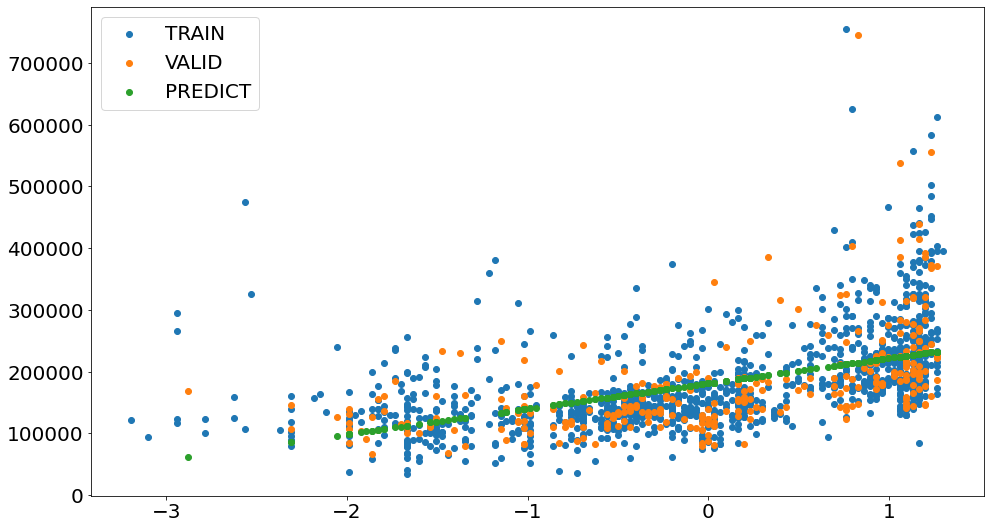

In [316]:
# 訓練データ、検証データ、予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std[:,1],y_train,label="TRAIN")
plt.scatter(X_valid_std[:,1],y_valid,label="VALID")
plt.scatter(X_valid_std[:,1],y_pred09,label="PREDICT")
plt.legend()
plt.plot();

In [317]:
# 平均二乗誤差
mse = MSE(y_pred09, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4971463657.0
RMSE70508.6


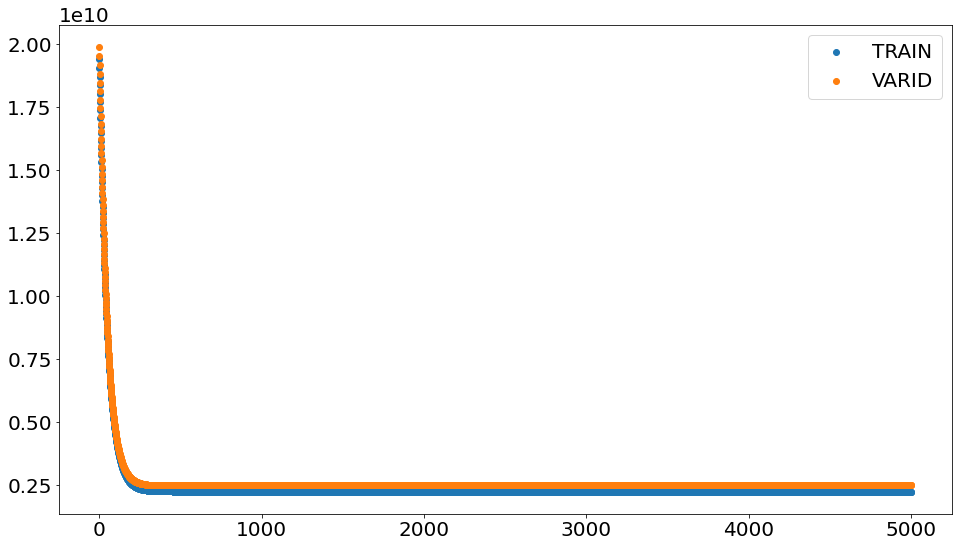

In [318]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg09.loss)),reg09.loss,label='TRAIN')
plt.scatter(range(len(reg09.val_loss)),reg09.val_loss,label='VARID')
plt.legend()
plt.plot();

In [320]:
# 特徴量に3乗を加える
X = train[['YearBuilt','YearBuilt','YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X[:,1] = X[:,1]**2
X[:,2] = X[:,2]**3
X

X.shape: (1460, 3)
y.shape: (1460,)


array([[      2003,    4012009, 8036054027],
       [      1976,    3904576, 7715442176],
       [      2001,    4004001, 8012006001],
       ...,
       [      1941,    3767481, 7312680621],
       [      1950,    3802500, 7414875000],
       [      1965,    3861225, 7587307125]])

In [321]:
# 訓練データ、検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (1168, 3)
y_train.shape: (1168,)
X_valid.shape: (292, 3)
y_valid.shape: (292,)


In [322]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [323]:
reg10 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg10.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred10 = reg10.predict(X_valid_std)

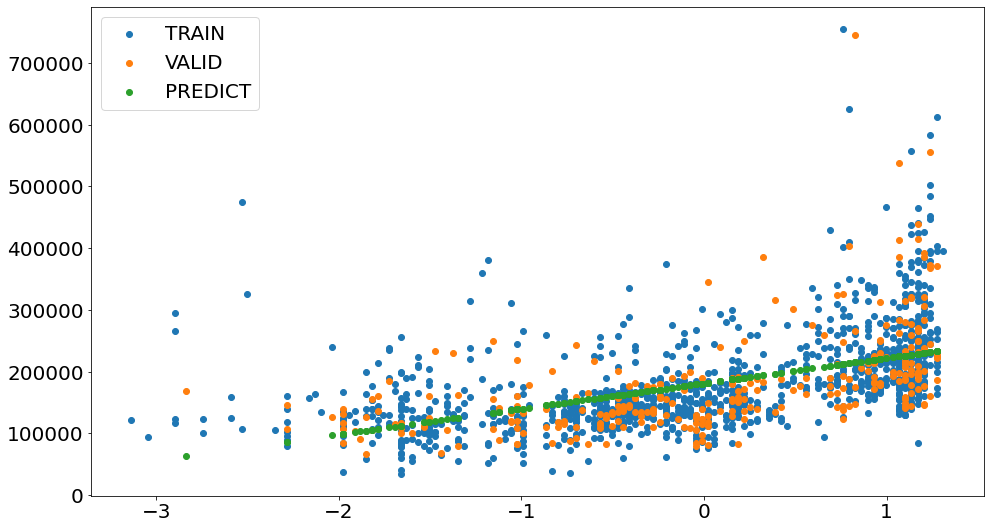

In [325]:
# 訓練データ、検証データ、予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std[:,2],y_train,label="TRAIN")
plt.scatter(X_valid_std[:,2],y_valid,label="VALID")
plt.scatter(X_valid_std[:,2],y_pred10,label="PREDICT")
plt.legend()
plt.plot();

In [326]:
# 平均二乗誤差
mse = MSE(y_pred10, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4960227093.5
RMSE70428.9


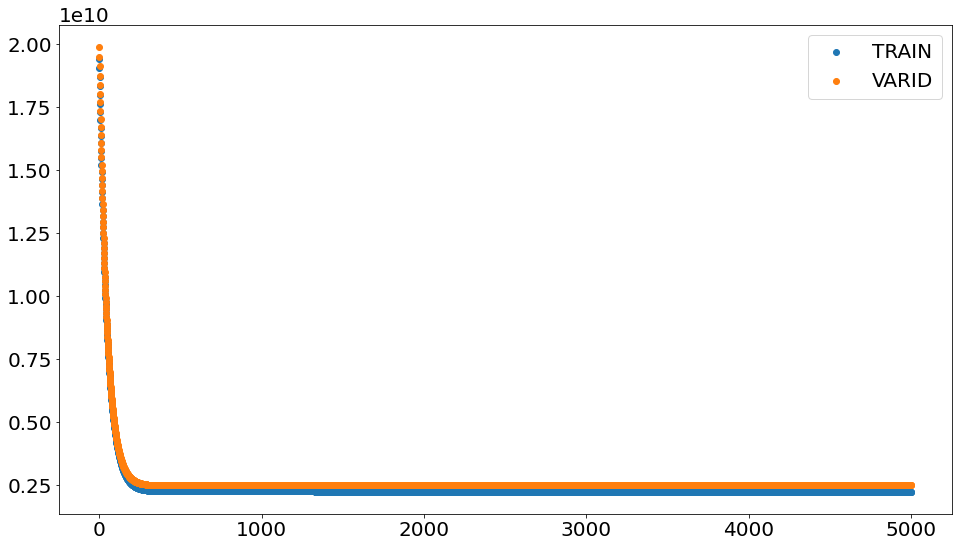

In [327]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg10.loss)),reg10.loss,label='TRAIN')
plt.scatter(range(len(reg10.val_loss)),reg10.val_loss,label='VARID')
plt.legend()
plt.plot();

- 2乗、３乗を追加することで評価指標が若干改善した
- 予測値は直線状に分布している

#### 特徴量を増やして検証する

In [328]:
X = train[['GrLivArea','YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X.shape: (1460, 2)
y.shape: (1460,)


In [329]:
# 訓練データ、検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (1168, 2)
y_train.shape: (1168,)
X_valid.shape: (292, 2)
y_valid.shape: (292,)


In [330]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [331]:
reg5 = ScratchLinearRegression(num_iter=10000, lr=0.01)

reg5.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred5 = reg5.predict(X_valid_std)

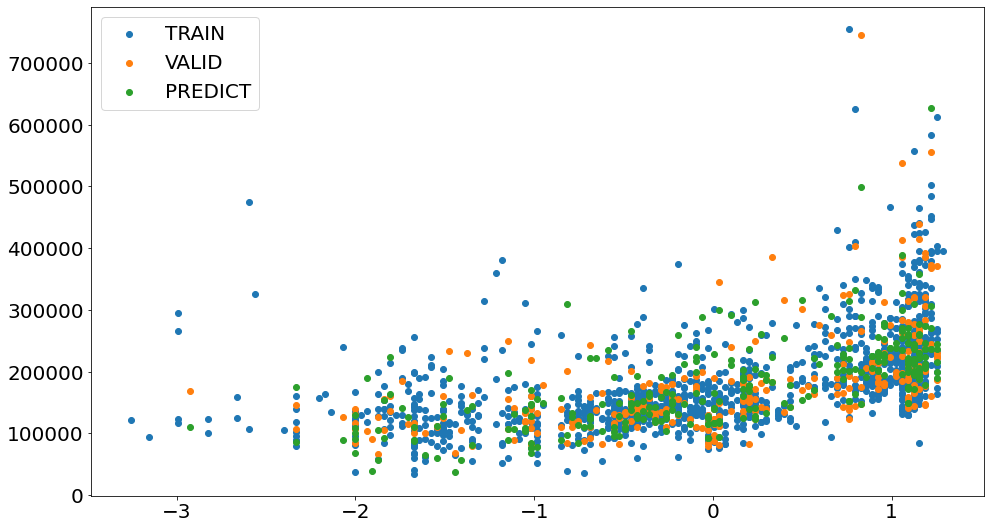

In [332]:
# 訓練データ、検証データ、予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std[:,1],y_train,label="TRAIN")
plt.scatter(X_valid_std[:,1],y_valid,label="VALID")
plt.scatter(X_valid_std[:,1],y_pred5,label="PREDICT")
plt.legend()
plt.plot();

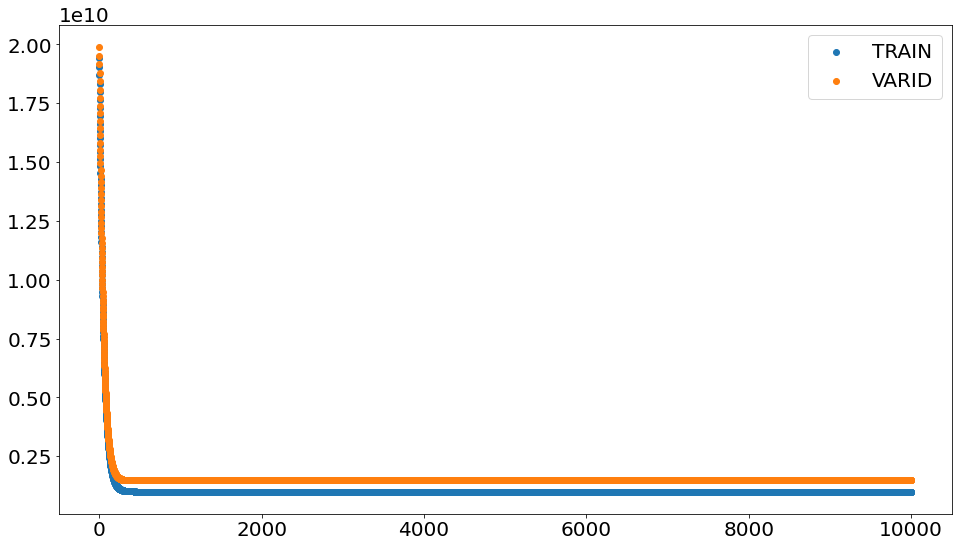

In [333]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg5.loss)),reg5.loss,label='TRAIN')
plt.scatter(range(len(reg5.val_loss)),reg5.val_loss,label='VARID')
plt.legend()
plt.plot();

In [334]:
# 平均二乗誤差
mse = MSE(y_pred5, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE2942066921.7
RMSE54240.8


In [335]:
reg6 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg6.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred6 = reg6.predict(X_valid_std)

In [336]:
# 平均二乗誤差
mse = MSE(y_pred6, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE2942066921.7
RMSE54240.8


In [337]:
reg6.theta

array([180808.8989726 ,  50765.58814766,  31427.62191205])

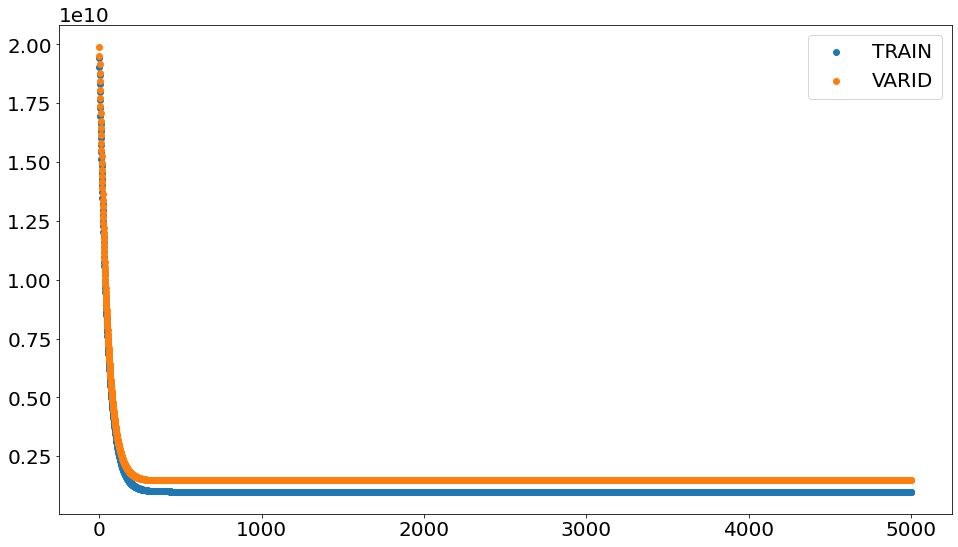

In [338]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg6.loss)),reg6.loss,label='TRAIN')
plt.scatter(range(len(reg6.val_loss)),reg6.val_loss,label='VARID')
plt.legend()
plt.plot();

- 特徴量を増やして推定すると、評価指標は大幅に改善し、分布上は分散が見受けられる

## 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$$
θ_j:=θ_j−α\frac{1}{m}\sum_{i=1}^{m}[(h_θ(x^i)−y^i)x^i_j]
$$   

以下の式から説明をはじめることができます。

$$
θ_j:=θ_j−\frac{∂}{∂θ_j}J(θ)
$$

目的関数（損失関数） J(θ)は次の式です。

$$
J(θ)=\frac{1}{2m}\sum_{i=1}^{m}(h_θ(x^i)−y^i)^2.
$$

θを最適化するのが最急降下法。
目的関数J（θ）をθで微分(Jの傾き)して、元のθから減算しθを更新する。
$$
\frac{1}{2m}\sum_{i=1}^{m}(x_θ^2ー2yx_θ+y^2)
$$
その後新しいθを使い、予測値を導き出し、平均二乗誤差を導き出す。
またその値を導く出す際に利用してθで微分し、

の繰り返しでθをどんどん小さくしていく

## 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

